# Preparação dos Dados

## Extração do Arquivo Tratado

In [1]:
# importando a biblioteca pandas para leitura do arquivo

import pandas as pd

In [2]:
# lendo o dataframe

df = pd.read_csv('/content/df_limpo.csv')

In [3]:
# verificando se a leitura foi correta

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


## Remoção de colunas irrelevantes

In [4]:
# entendendo as colunas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [5]:
# entendendo os valores nulos

df.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [6]:
# retirando a coluna Customer ID

df = df.drop('customerID',axis=1)

In [7]:
# verificando se foi retirado

df.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [8]:
# verificando a correlação entre as colunas Total Day e Account Charges Monthly

correlacao = df['account.Charges.Monthly'].corr(df['Total.Day'])
print(f"Correlação entre Charges.Monthly e Total.Day: {correlacao}")

Correlação entre Charges.Monthly e Total.Day: 0.9962269577898994


In [9]:
# verificando a correlação entre as colunas Charges Monthly e Charges Total

correlacao_2 = df['account.Charges.Monthly'].corr(df['account.Charges.Total'])
print(f"Correlação entre Charges.Monthly e Charges.Total: {correlacao_2}")

Correlação entre Charges.Monthly e Charges.Total: 0.6510648032262025


In [10]:
# removendo a coluna de Total.Day

df = df.drop('Total.Day',axis=1)

In [11]:
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [12]:
# ajustando as colunas do Internet Service

df['internet.InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [13]:
# copiando o df para um df limpo

df_limpo = df.copy()

In [14]:
# substituindo os valores de Internet Service No em todas as colunas internet

colunas_ajuste = ['internet.OnlineSecurity', 'internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies']

for column in colunas_ajuste:
    df_limpo[column] = df_limpo[column].replace('No internet service', 'No')

In [15]:
# verificando se deu certo

df_limpo['internet.OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

## Encoding

In [16]:
# entendendo quais variáveis iremos transformar a partir de valores únicos

df_limpo.nunique()

,0
Churn,2
customer.gender,2
customer.SeniorCitizen,2
customer.Partner,2
customer.Dependents,2
customer.tenure,73
phone.PhoneService,2
phone.MultipleLines,3
internet.InternetService,3
internet.OnlineSecurity,2


In [17]:
# entendendo quais são as variáveis categóricas a partir do dtype

df_limpo.dtypes

,0
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object
internet.OnlineSecurity,object


In [18]:
# atribuindo as variáveis categóricas a uma variável

variaveis_categoricas = df_limpo.select_dtypes(include='object').columns
print(variaveis_categoricas)

Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')


In [19]:
# criando dataframe encoded

df_encoded = pd.get_dummies(df_limpo, columns=variaveis_categoricas, drop_first=True)

In [20]:
# testando o novo df

df_encoded.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True


In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   Churn_Yes                                      7043 non-null   bool   
 5   customer.gender_Male                           7043 non-null   bool   
 6   customer.Partner_Yes                           7043 non-null   bool   
 7   customer.Dependents_Yes                        7043 non-null   bool   
 8   phone.PhoneService_Yes                         7043 non-null   bool   
 9   phone.MultipleLines_No phone service           7043 

In [22]:
# verificando os valores nulos da coluna account.Charges.Total

print(df_encoded['account.Charges.Total'].isnull().sum())

11


In [23]:
# retirando os valores nulos da coluna account.Charges

df_encoded = df_encoded.dropna(subset=['account.Charges.Total'])

In [24]:
df_encoded['account.Charges.Total'].isnull().sum()

np.int64(0)

## Verificação da Proporção de Evasão

In [25]:
# calculando a proporção de clientes Churn_Yes

df_encoded['Churn_Yes'].value_counts(normalize=True)

,proportion
Churn_Yes,
False,0.734215
True,0.265785


# Correlação e Seleção de Variáveis

## Análise de Correlação

In [26]:
corr = df_encoded.corr()

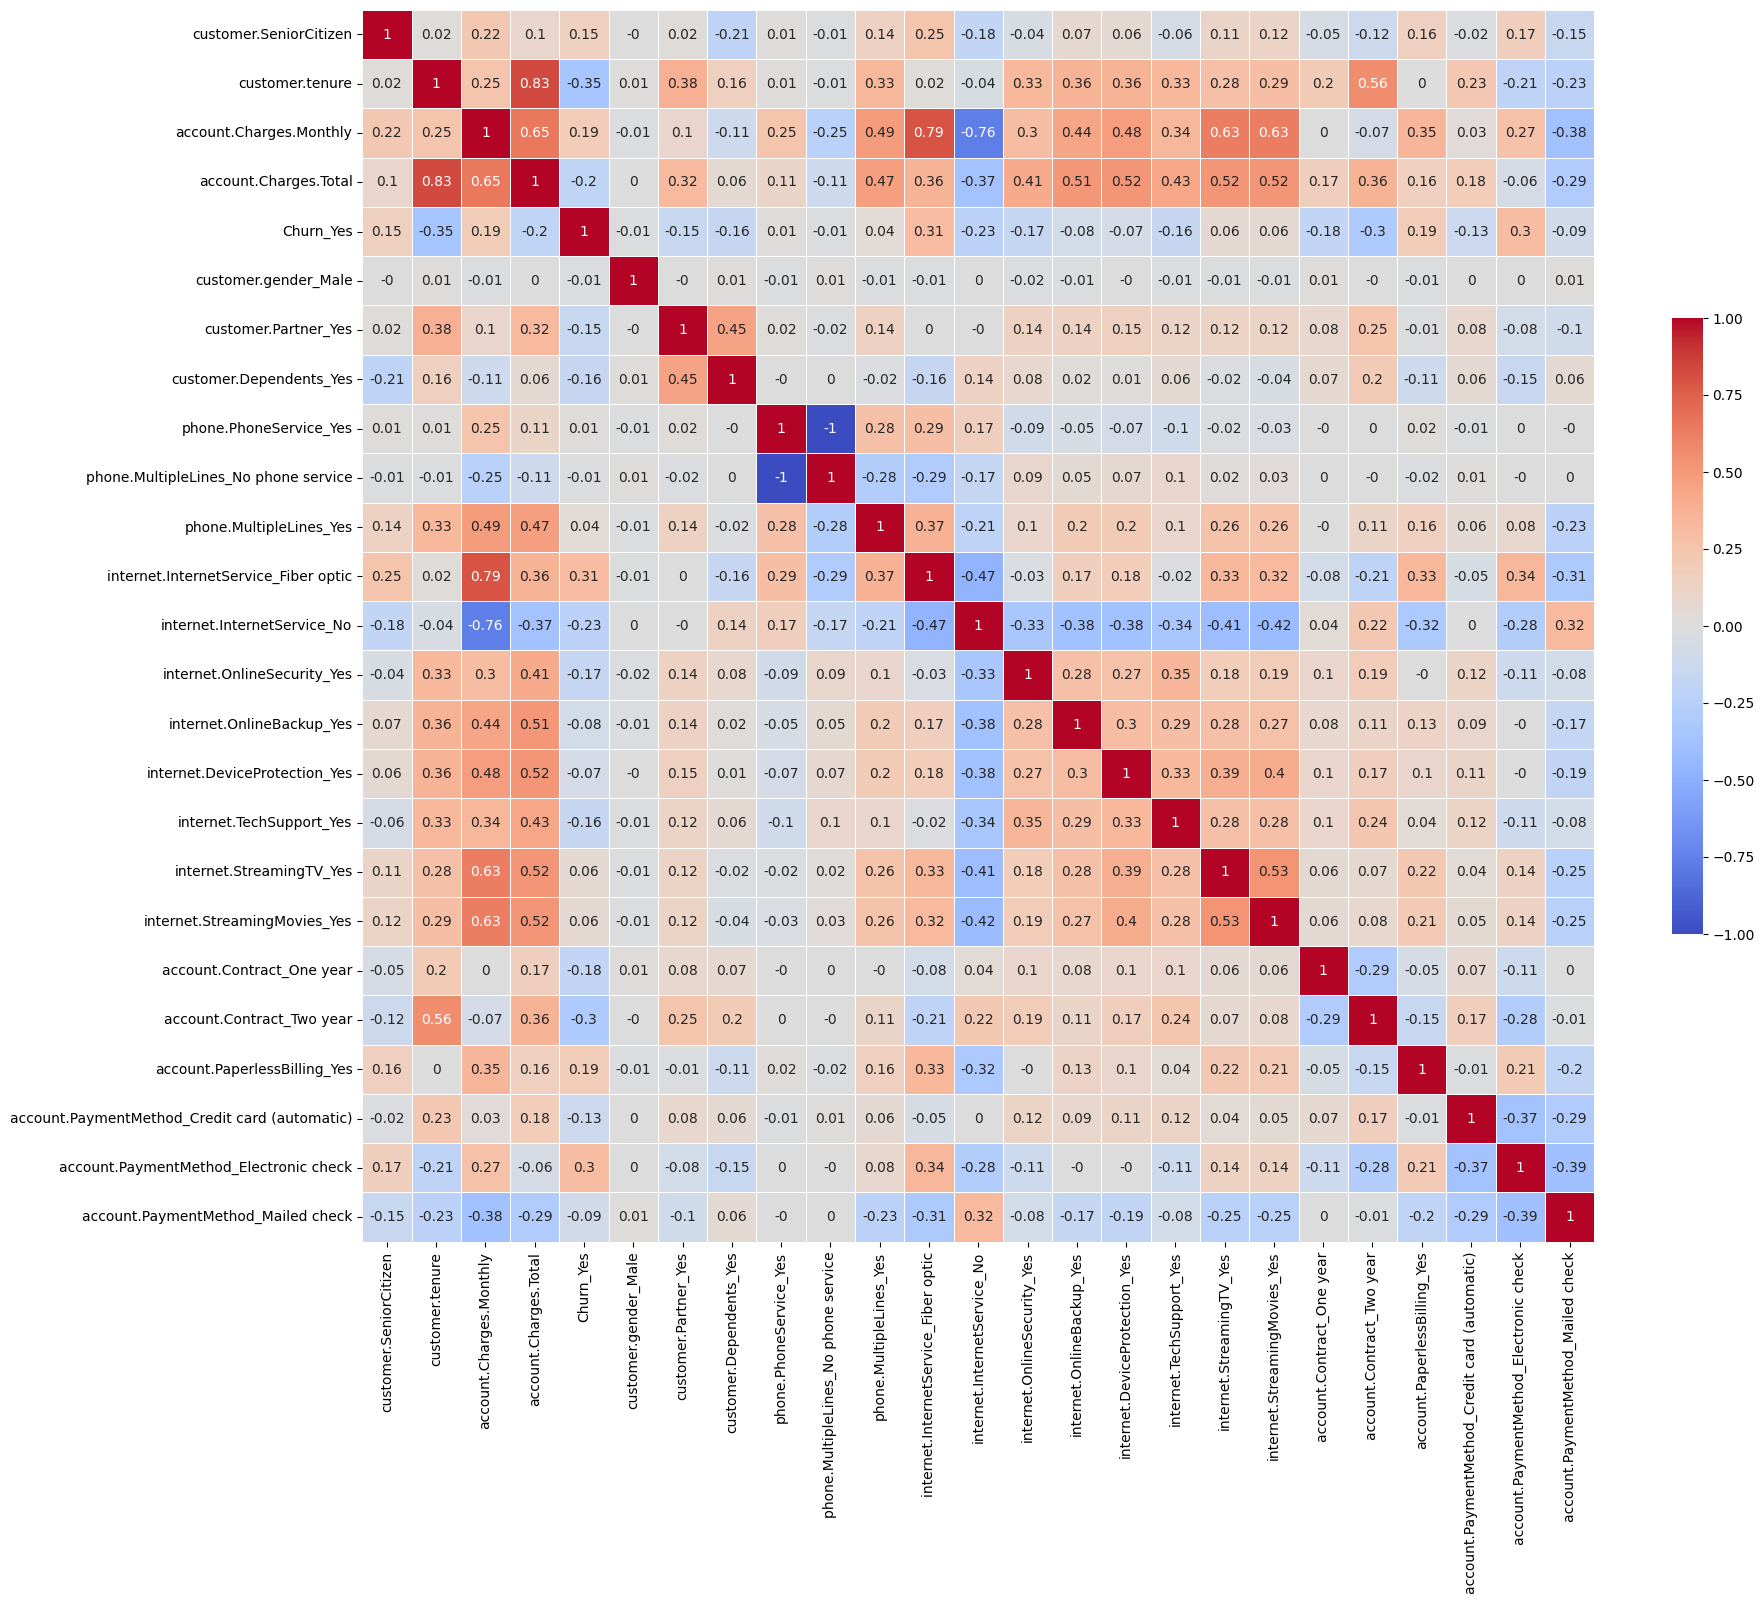

In [27]:
# analisando correlações em um gráfico de heatmap

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
ax = sns.heatmap(np.round(corr,2), vmax=1, vmin=-1, center=0, square=True, linewidths=.5, annot=True, cmap='coolwarm', cbar_kws={'shrink':.5})
plt.show()

In [28]:
# filtrando as correlações mais relevantes a partir da correlação com a variável Churn_Yes

corr_churn = corr['Churn_Yes'].drop('Churn_Yes')

In [29]:
# filtrando apenas correlações com valor absoluto maior que 0.2

corr_churn_filtrado = corr_churn[abs(corr_churn) > 0.2]

In [30]:
# ordenando por valor absoluto da correlação decrescente

corr_churn_ordenado = corr_churn_filtrado.reindex(corr_churn_filtrado.abs().sort_values(ascending=False).index)

In [31]:
corr_churn_ordenado

,Churn_Yes
customer.tenure,-0.354049
internet.InternetService_Fiber optic,0.307463
account.Contract_Two year,-0.301552
account.PaymentMethod_Electronic check,0.301455
internet.InternetService_No,-0.227578


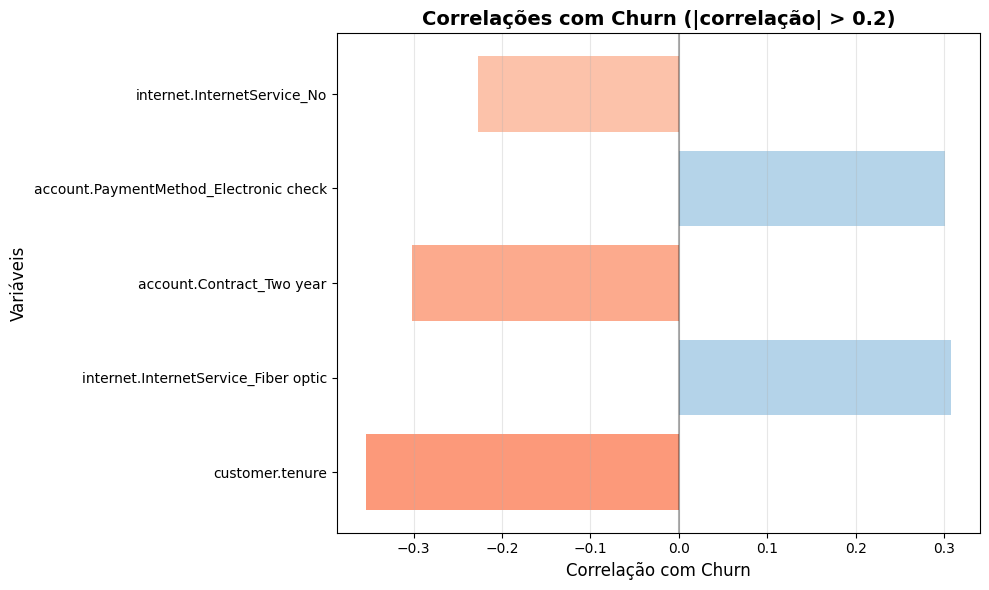

In [82]:
# configurando estilo do gráfico

plt.style.use('default')
sns.set_palette("husl")

# criando paleta de cores
colors = [
    plt.cm.Blues(abs(val)) if val > 0 else plt.cm.Reds(abs(val))
    for val in corr_churn_ordenado.values
]

# plotando o gráfico para avaliar a correlação das variáveis mais relevantes

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(corr_churn_ordenado)), corr_churn_ordenado.values, color=colors)

# personalizando  o gráfico
plt.yticks(range(len(corr_churn_ordenado)), corr_churn_ordenado.index, fontsize=10)
plt.xlabel('Correlação com Churn', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.title('Correlações com Churn (|correlação| > 0.2)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# ajustando layout e mostrar o gráfico
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

## Análises direcionadas

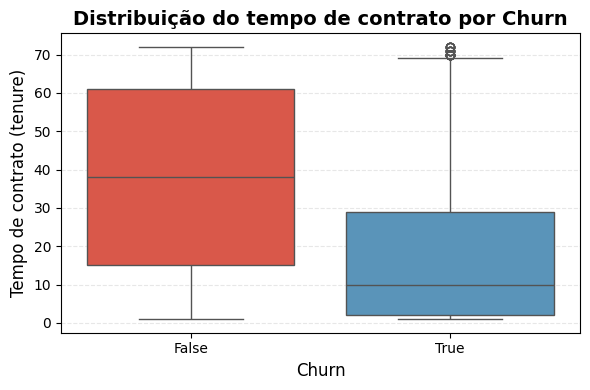

In [33]:
# análise de tempo de contrato x evasão (churn) em boxplot

plt.figure(figsize=(6, 4))
colors = {
    False: plt.cm.Reds(0.6),
    True: plt.cm.Blues(0.6)
}

sns.boxplot(
    x='Churn_Yes',
    y='customer.tenure',
    data=df_encoded,
    palette=colors,
    hue='Churn_Yes',
    legend=False
)

plt.xlabel("Churn", fontsize=12)
plt.ylabel("Tempo de contrato (tenure)", fontsize=12)
plt.title("Distribuição do tempo de contrato por Churn", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

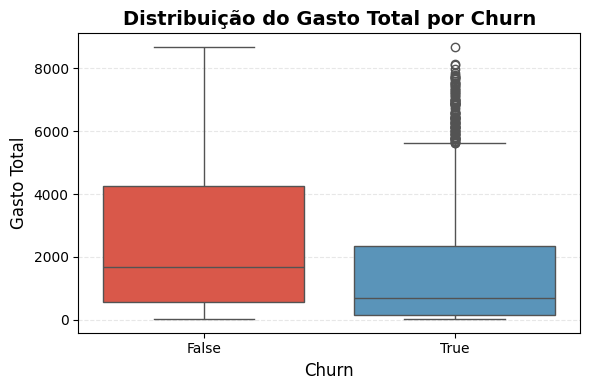

In [34]:
# análise de gasto total x evasão em um gráfico de boxplot


plt.figure(figsize=(6, 4))

sns.boxplot(
    data=df_encoded,
    x="Churn_Yes",
    y="account.Charges.Total",
    palette={False: plt.cm.Reds(0.6),
    True: plt.cm.Blues(0.6)},
    hue='Churn_Yes',
    legend=False
)

plt.xlabel("Churn", fontsize=12)
plt.ylabel("Gasto Total", fontsize=12)
plt.title("Distribuição do Gasto Total por Churn", fontsize=14, fontweight="bold")
plt.grid(axis='y', linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

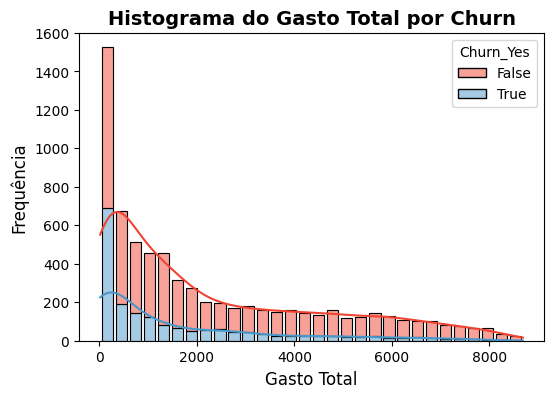

In [80]:
# análise de gasto total por churn em um histograma

plt.figure(figsize=(6, 4))

sns.histplot(
    data=df_encoded,
    x="account.Charges.Total",
    palette=colors,
    hue="Churn_Yes",
    multiple="stack",
    shrink=0.8,
    kde=True,
    bins=30,
    alpha=0.5
)
plt.xlabel("Gasto Total", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.title("Histograma do Gasto Total por Churn", fontsize=14, fontweight="bold")
plt.show()

## Extra: Análise de Multicolinearidade

In [36]:
# importando as bibliotecas para análise de multicolinearidade

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [37]:
# definindo as variáveis para o teste

X = df_encoded.drop('Churn_Yes', axis=1)
X_const = add_constant(X)

In [38]:
# calculando o VIF

X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
8,phone.PhoneService_Yes,inf
9,phone.MultipleLines_No phone service,inf
3,account.Charges.Monthly,866.089640
11,internet.InternetService_Fiber optic,148.500814
12,internet.InternetService_No,104.213701
18,internet.StreamingMovies_Yes,24.156394
17,internet.StreamingTV_Yes,24.080019
4,account.Charges.Total,10.811490
2,customer.tenure,7.584453
10,phone.MultipleLines_Yes,7.289761


In [39]:
# filtrando o dataframe para retirar as variáveis com VIF muito alta ou infinita

cols_to_drop = ['phone.PhoneService_Yes','phone.MultipleLines_No phone service','internet.InternetService_No']

X_filtered = X_const.copy()
X_filtered.drop(columns=cols_to_drop, inplace=True)
X_filtered = X_filtered.astype(float)

vif_data_filtered = pd.DataFrame()
vif_data_filtered["Feature"] = X_filtered.columns
vif_data_filtered["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data_filtered.sort_values(by='VIF', ascending=False))

,Feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


In [40]:
# retirando o Charges.Total

X_filtered = X_filtered.drop('account.Charges.Total', axis=1)

In [41]:
# recalculando a vif

X_filtered = X_filtered.astype(float)

vif_data_filtered = pd.DataFrame()
vif_data_filtered["Feature"] = X_filtered.columns
vif_data_filtered["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data_filtered.sort_values(by='VIF', ascending=False))


,Feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


# Modelagem Preditiva

## Separação de Dados

In [42]:
# importando as bibliotecas necessárias

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [43]:
# definindo as variáveis

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

In [44]:
# separando as variáveis entre treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Criação de modelos

### Logistic Regression

In [45]:
# importando a biblioteca do modelo

from sklearn.linear_model import LogisticRegression

In [46]:
# normalizando com Standard Scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# balanceando os dados com SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [48]:
# rodando o modelo de Logistic Regression

modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_train_resampled, y_train_resampled)

# realizando as previsões
y_pred_lr = modelo_lr.predict(X_test_scaled)
y_prob_lr = modelo_lr.predict_proba(X_test_scaled)[:, 1]

In [49]:
# avaliando o modelo

print('Modelo de Regressão Logística')
print('Acurácia:', accuracy_score(y_test, y_pred_lr))
print('ROC AUC:', roc_auc_score(y_test, y_prob_lr))
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred_lr))
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred_lr))

Modelo de Regressão Logística
Acurácia: 0.7511848341232228
ROC AUC: 0.8454813582220259
Matriz de Confusão:
[[1130  419]
 [ 106  455]]
Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



### XGBoost

In [50]:
# importando bibliotecas

import xgboost as xgb
from xgboost import XGBClassifier

In [51]:
# rodando o modelo XGBoost

modelo_xgb = XGBClassifier(random_state=42, eval_metric='logloss')
modelo_xgb.fit(X_train_resampled, y_train_resampled)

# realizando as previsões

y_pred_xgb = modelo_xgb.predict(X_test_scaled)
y_prob_xgb = modelo_xgb.predict_proba(X_test_scaled)[:, 1]

In [52]:
# avaliando o modelo

print('Modelo de XGBoost')
print('Acurácia:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC:', roc_auc_score(y_test, y_prob_xgb))
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred_xgb))
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred_xgb))

Modelo de XGBoost
Acurácia: 0.7649289099526067
ROC AUC: 0.8086874517398954
Matriz de Confusão:
[[1299  250]
 [ 246  315]]
Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.84      0.84      0.84      1549
        True       0.56      0.56      0.56       561

    accuracy                           0.76      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.77      0.76      0.77      2110



# Análise dos Modelos

## Comparação geral

| Métrica | Logistic Regression | XGBoost | 🥇 Vencedor |
|---------|-------------------|---------|-------------|
| **Acurácia** | 75.1% | 76.5% | XGBoost |
| **ROC AUC** | 84.5% | 80.9% | **Logistic Regression** |
| **Recall Churn** | 81% | 56% | **Logistic Regression** |
| **Precision Churn** | 52% | 56% | XGBoost |

## Comparação Matriz de Confusão

In [55]:
# importando o Display Matrix para comparar os modelos

from sklearn.metrics import ConfusionMatrixDisplay

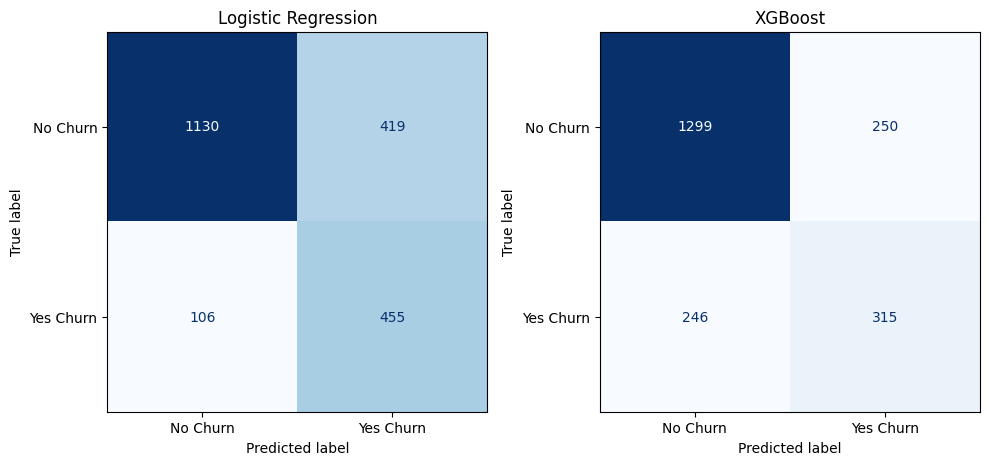

In [58]:
# Matrizes de confusão
cm_logreg = np.array([[1130, 419],
                      [106, 455]])

cm_xgb = np.array([[1299, 250],
                   [246, 315]])

# Nomes das classes
classes = ["No Churn", "Yes Churn"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Logistic Regression
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=classes)
disp1.plot(ax=axes[0], cmap="Blues", colorbar=False)
axes[0].set_title("Logistic Regression")

# XGBoost
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=classes)
disp2.plot(ax=axes[1], cmap="Blues", colorbar=False)
axes[1].set_title("XGBoost")

plt.tight_layout()
plt.show()

### Análise Detalhada

**Logistic Regression - "Detector Sensível"**
- **Força**: Captura 81% dos churns (455/561)
- **Fraqueza**: Muitos falsos positivos (419)
- **Perfil**: Modelo "cauteloso" - prefere alertar demais

**XGBoost - "Detector Conservador**  
- **Força**: Menos falsos positivos (250 vs 419)
- **Fraqueza**: Perde muitos churns reais (246/561 = 44%)

### Conclusões

LOGISTIC REGRESSION se apresenta como melhor modelo

**Por quê?**

1. **ROC AUC superior (84.5% vs 80.9%)** - Melhor capacidade de discriminação geral
2. **Recall de Churn muito superior (81% vs 56%)** - Captura mais clientes em risco
3. **Para churn, é melhor "errar para mais"** - Custa menos fazer campanha desnecessária do que perder cliente

Exemplo: IMPACTO NO NEGÓCIO

**Cenário: 1000 clientes que vão fazer churn**

| Modelo | Clientes Salvos | Clientes Perdidos | Taxa de Salvamento |
|--------|----------------|-------------------|-------------------|
| **Logistic** | 810 | 190 | 81% |
| **XGBoost** | 560 | 440 | 56% |

**Diferença**: Logistic salva **250 clientes a mais**!

ESTRATÉGIAS DE USO

**1. Use Logistic Regression SE:**
- Custo de retenção é baixo
- Perder cliente é muito caro
- Prefere campanhas amplas

**2. Use XGBoost SE:**
- Campanhas de retenção são caras
- Prefere precisão a recall
- Recursos limitados para retenção

### Recomendação final

RECOMENDAÇÃO FINAL

**Utilizar a Logistic Regression** como modelo principal para churn, pois:
- AUC superior indica melhor modelo geral
- Recall alto é crucial para churn
- 81% vs 56% de detecção é uma diferença enorme

### Próximos passos

1. Pré-processamento dos dados
- **Testar outras técnicas de balanceamento além do SMOTE**:
  - **SMOTEENN** ou **SMOTETomek** → combina oversampling + limpeza de ruído.
  - **Random Undersampling** → remover clientes não churn em excesso.
  - **Class Weights** → penalizar mais os erros da classe churn sem alterar os dados.
    ```python
    LogisticRegression(class_weight='balanced')
    XGBClassifier(scale_pos_weight=ratio)
    ```

- **Feature Engineering**  
  Criar novas variáveis pode ter mais impacto que trocar de modelo:
  - Tempo médio até cancelamento.
  - Razão entre gasto atual e gasto histórico.
  - Número de interações recentes do cliente.

2. Modelagem
- **Validação cruzada (Cross-Validation, ex. StratifiedKFold)**  
  Evita depender de uma única divisão treino/teste e gera resultados mais confiáveis.

- **Ajuste de hiperparâmetros (Hyperparameter Tuning)**  
  Tanto Logistic Regression quanto XGBoost podem melhorar bastante com `GridSearchCV`, `RandomizedSearchCV` ou **Optuna**.
  - Logistic Regression → parâmetro `C` (regularização), solver.  
  - XGBoost → parâmetros como `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`.

- **Ensembles**  
  Combinar modelos pode melhorar a performance:
  - Stacking ou blending de Logistic Regression + XGBoost.  
  - Une recall alto de um com precisão do outro.

3. Avaliação
- **Métricas focadas no negócio**  
  Como churn é desbalanceado, acurácia pode enganar.  
  - Usar **F1-score** (equilíbrio entre recall e precisão).  
  - Usar **PR AUC (Precision-Recall AUC)** → mais informativo para dados desbalanceados.  

- **Threshold Tuning**  
  Atualmente, o corte padrão `0.5` está sendo usado.  
  - Ajustar o threshold pode aumentar recall sem perder tanto na precisão.  
  - Exemplo: usar `predict_proba` e escolher o ponto ótimo na curva Precision-Recall.

## Análise de Importância das Variáveis

### Logistic Regression

In [71]:
# extraindo o coef do modelo

coef = modelo_lr.coef_[0]

# juntando com os nomes das variáveis X_train
feature_importance_log = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': coef
})

# Ordenando pela importância absoluta
feature_importance_log['Importância_Absoluta'] = np.abs(feature_importance_log['Coeficiente'])
feature_importance_log = feature_importance_log.sort_values(by='Importância_Absoluta', ascending=False)

print(feature_importance_log[['Variável','Coeficiente']])

                                         Variável  Coeficiente
1                                 customer.tenure    -1.575370
3                           account.Charges.Total     0.903122
2                         account.Charges.Monthly    -0.870566
10           internet.InternetService_Fiber optic     0.745826
19                      account.Contract_Two year    -0.614898
11                    internet.InternetService_No    -0.609458
18                      account.Contract_One year    -0.341667
16                       internet.StreamingTV_Yes     0.253754
17                   internet.StreamingMovies_Yes     0.206876
22         account.PaymentMethod_Electronic check     0.203639
20                   account.PaperlessBilling_Yes     0.187898
15                       internet.TechSupport_Yes    -0.155955
9                         phone.MultipleLines_Yes     0.120188
12                    internet.OnlineSecurity_Yes    -0.106819
6                         customer.Dependents_Yes    -0

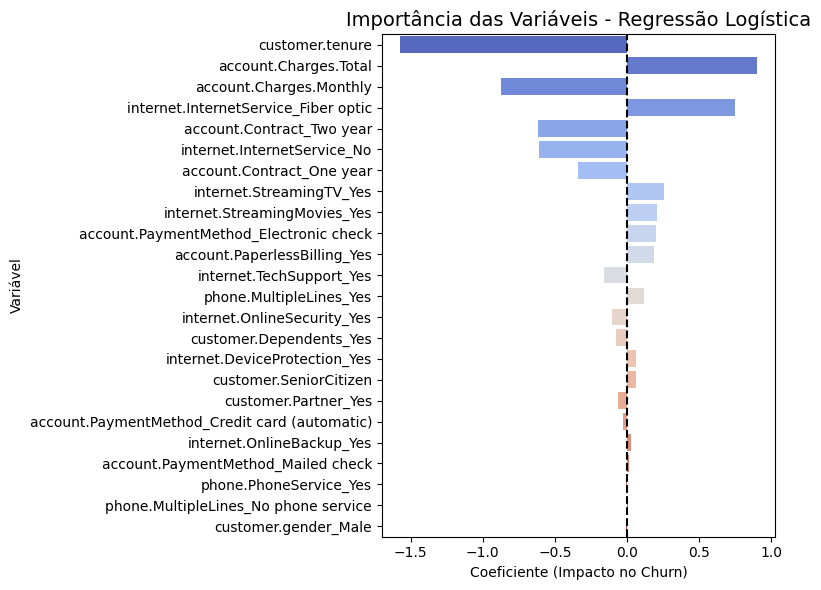

In [76]:
# visualizando em gráfico

# Plotando os coeficientes ordenados
plt.figure(figsize=(8,6))
sns.barplot(
    data=feature_importance_log,
    x='Coeficiente',
    y='Variável',
    palette='coolwarm',
    hue='Variável',
    legend=False
)

plt.title("Importância das Variáveis - Regressão Logística", fontsize=14)
plt.xlabel("Coeficiente (Impacto no Churn)")
plt.ylabel("Variável")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

### XGBoost

In [72]:
# utilizando a função feature_importance do XGBoost

feature_importance_xgb = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': modelo_xgb.feature_importances_
})

# Ordenando pela importância
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importância', ascending=False)

print(feature_importance_xgb)

                                         Variável  Importância
19                      account.Contract_Two year     0.286040
10           internet.InternetService_Fiber optic     0.148973
18                      account.Contract_One year     0.139707
11                    internet.InternetService_No     0.076334
17                   internet.StreamingMovies_Yes     0.036632
16                       internet.StreamingTV_Yes     0.027836
5                            customer.Partner_Yes     0.024734
20                   account.PaperlessBilling_Yes     0.024286
22         account.PaymentMethod_Electronic check     0.023710
9                         phone.MultipleLines_Yes     0.022649
7                          phone.PhoneService_Yes     0.021625
13                      internet.OnlineBackup_Yes     0.020167
4                            customer.gender_Male     0.020082
15                       internet.TechSupport_Yes     0.019478
12                    internet.OnlineSecurity_Yes     0

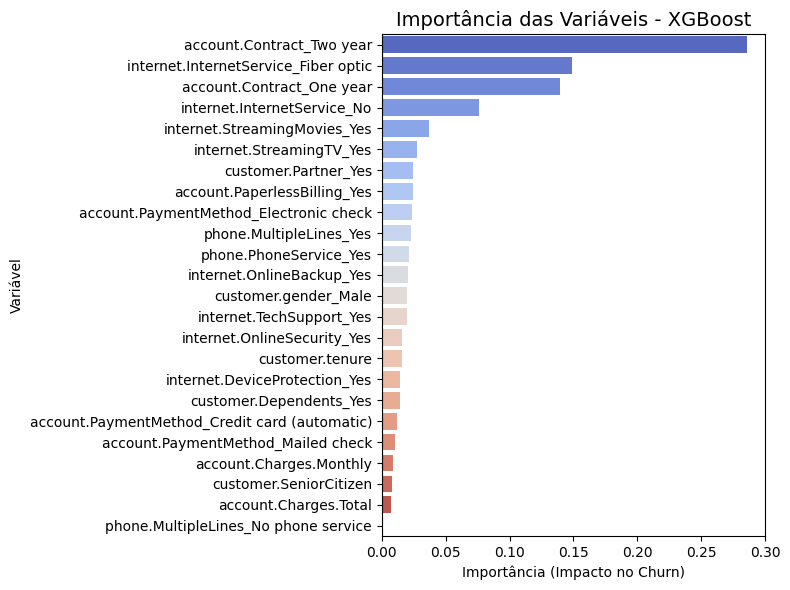

In [78]:
# visualizando em gráfico

# Plotando os coeficientes ordenados
plt.figure(figsize=(8,6))
sns.barplot(
    data=feature_importance_xgb,
    x='Importância',
    y='Variável',
    palette='coolwarm',
    hue='Variável',
    legend=False
)

plt.title("Importância das Variáveis - XGBoost", fontsize=14)
plt.xlabel("Importância (Impacto no Churn)")
plt.ylabel("Variável")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

### Conclusão da Análise de Variáveis

**Conclusão: Fatores que Influenciam a Evasão de Clientes**

**Principais Fatores Identificados**

**Regressão Logística**
- **Tempo de permanência do cliente (customer.tenure)** apresentou coeficiente negativo elevado, indicando que clientes com maior tempo de contrato têm menor propensão a evadir.  
- **Gastos totais (account.Charges.Total)** aumentam a probabilidade de churn.  
- **Plano de internet por fibra ótica (internet.InternetService_Fiber optic)** está associado a maior chance de evasão.  
- **Contrato anual ou de dois anos (account.Contract_One year / account.Contract_Two year)** reduzem a probabilidade de churn, reforçando o papel de contratos mais longos na retenção.

**XGBoost**
- **Contrato de dois anos** foi a variável mais relevante, confirmando a importância de vínculos contratuais mais duradouros.  
- **Tipo de serviço de internet (fiber optic vs. no service)** teve grande peso, sugerindo que a percepção de valor do serviço de internet é decisiva na evasão.  
- **Contrato de um ano** também contribuiu significativamente para reduzir churn, em linha com o modelo logístico.  
- **Serviços adicionais (streaming, suporte técnico, billing eletrônico)** tiveram importância intermediária, indicando efeito moderado na retenção.

---

**Estratégias de Retenção Propostas**

1. **Incentivar contratos de longo prazo**  
   - Criar ofertas atrativas para clientes migrarem de planos mensais para anuais ou bianuais.  
   - Proporcionar descontos progressivos ou benefícios adicionais vinculados à fidelidade.

2. **Melhorar a experiência do serviço de internet por fibra ótica**  
   - Monitorar a satisfação de clientes com este serviço, uma vez que ele foi associado a maior churn.  
   - Investir em qualidade, estabilidade e suporte técnico específico para usuários de fibra ótica.

3. **Gestão de clientes com gastos elevados**  
   - Identificar clientes com alto gasto total e oferecer atendimento diferenciado, bônus ou pacotes de valor agregado.  
   - Reduzir o risco de evasão de clientes considerados premium.

4. **Engajamento em serviços adicionais**  
   - Promover adesão a serviços de segurança online, suporte técnico e entretenimento (streaming), que mostraram influência positiva na retenção.  
   - Criar pacotes integrados que aumentem o custo de troca para concorrentes.

---

**Considerações Finais**

Ambos os modelos confirmam que:
- contratos mais longos
- tempo de permanência
- perfil de uso da internet

são fatores determinantes na evasão.  
As estratégias de retenção devem focar na **fidelização por meio de planos de longo prazo**, **monitoramento da satisfação em serviços de internet**, e **gestão ativa de clientes de alto valor**.  

Dessa forma, é possível reduzir a evasão e aumentar o tempo de relacionamento com a base de clientes.
